# COMP0120 Project - Support Vector Machines (SVMs)
## John Duffy, Student Number: 19154676
## Project Code


In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Load Iris dataset.

from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]
y_names = iris["target_names"]

### Introduction

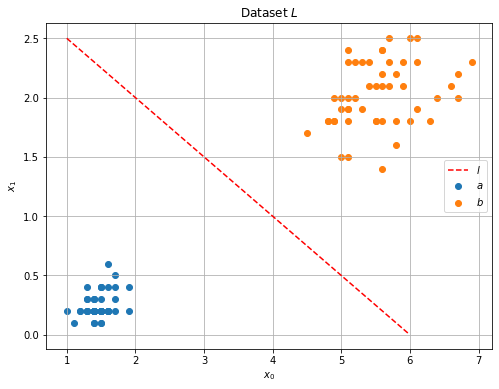

In [47]:
# Petal Data
labels = ["$a$", "$b$"]
plt.figure(figsize=(8, 6))
for i, value in enumerate([0, 2]):
    plt.scatter(X[y == value, 2], X[y == value, 3], label=labels[i])
x0 = np.arange(1, 6, 0.01)
m = -0.5
c = 3.0
x1 = m * x0 + c
plt.plot(x0, x1, "--r", label="$l$")
plt.title("Dataset $L$")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend(loc="center right")
plt.grid()
plt.savefig("intro_1.pdf")
plt.show()

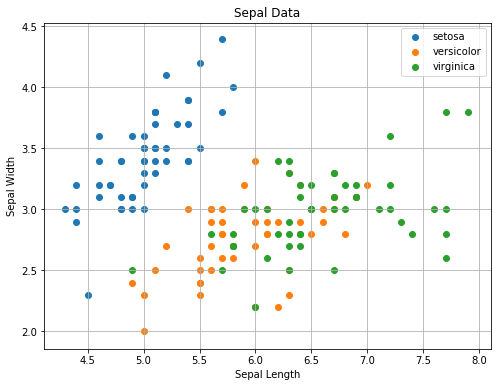

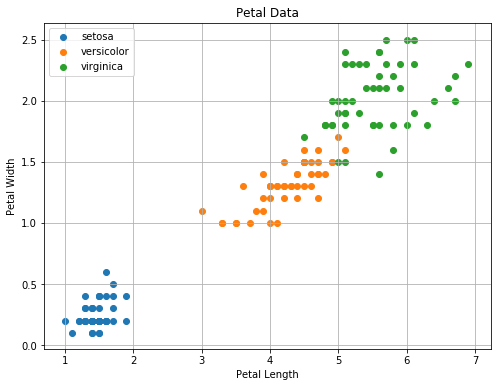

In [2]:
# Sepal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=y_names[i])
plt.title("Sepal Data")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid()
plt.savefig("iris_sepal.pdf")
plt.show()

# Petal Data
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=y_names[i])
plt.title("Petal Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()
plt.savefig("iris_petal.pdf")
plt.show()

In [20]:
plt.figure(figsize=(8, 6))
for i in np.sort(np.unique(y)):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=y_names[i])
x = np.arange(1, 7, 0.01)
m = -1
c = 2.5
y = m * x + c
plt.plot(x, y)
plt.title("Petal Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()
plt.savefig("iris_petal.pdf")
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 600

<Figure size 576x432 with 0 Axes>